In [1]:
# importing the required labraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [3]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [4]:
# Reading the csv file 
heart=pd.read_csv("heart_v2.csv")

In [5]:
# inspecting the DataFrame

heart.head()

age  sex   BP  cholestrol  heart disease
0   70    1  130         322              1
1   67    0  115         564              0
2   57    1  124         261              1
3   64    1  128         263              0
4   74    0  120         269              0

Please note that:

Heart disease = 0 means that the person does not have heart disease.
Heart disease = 1 means that the person has heart disease.

 

sex = 0 means that the person is female.

sex = 1 means that the person is male.

In [6]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [7]:
# Let's check the dimensions of the dataframe

heart.shape

(270, 5)

In [8]:
# lets check the propotion of the classes

heart["heart disease"].value_counts()

0    150
1    120
Name: heart disease, dtype: int64

Not exactly balanced but not either heavily imbalalanced also.So,its fine to go with

# Split into train and test sets

In [9]:
df_train,df_test=train_test_split(heart,train_size=0.7,random_state=42)

In [10]:
X_train=df_train.drop(columns=["heart disease"],axis=1)
y_train=df_train["heart disease"]
X_test=df_test.drop(columns=["heart disease"],axis=1)
y_test=df_test["heart disease"]

In [11]:
X_train.shape

(189, 4)

In [12]:
X_test.shape

(81, 4)

Let’s now move on to building the decision tree using the default parameters of the DecisionTreeClassifier() function except for the tree depth.

## Building the Decision Tree

In [13]:
# Instantiate an Object for Decision Tree Classifier

dt=DecisionTreeClassifier(max_depth=3)

In [14]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

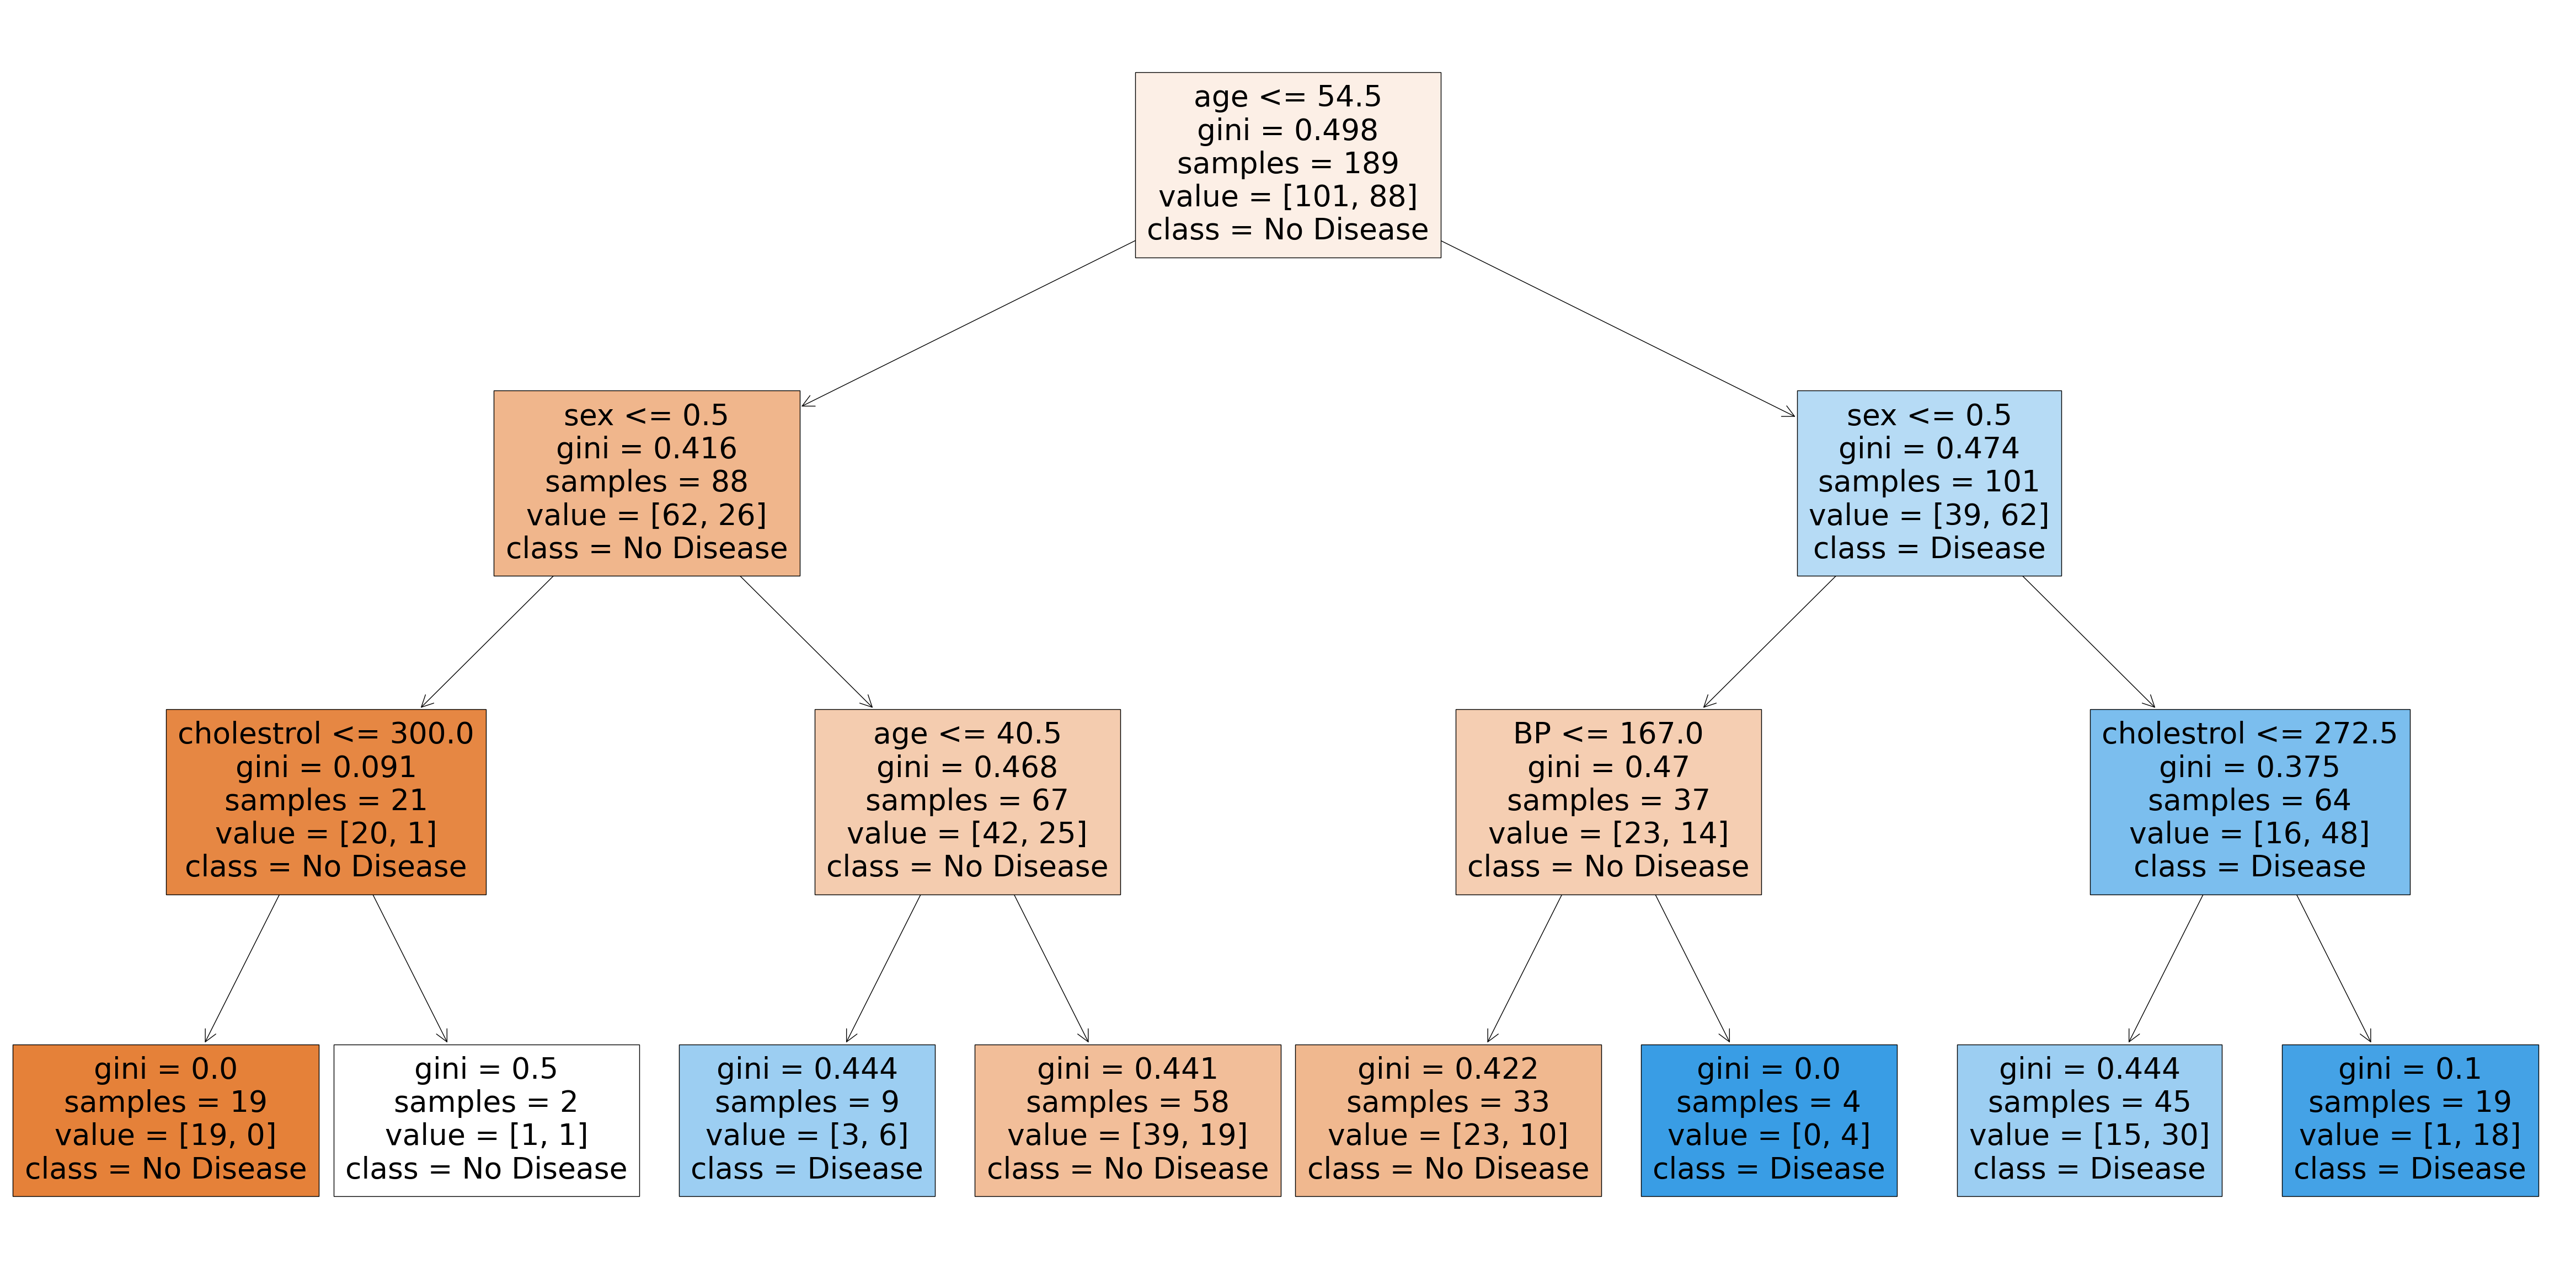

In [15]:
from sklearn.tree import plot_tree


plt.figure(figsize=(60,30))
plot_tree(dt,feature_names=list(X_train.columns),class_names=['No Disease',"Disease"],filled=True)
plt.show()

let's now evaluate how the model that we built is performing on the unseen data.

# Evaluating model performance

In [16]:
y_train_pred=dt.predict(X_train)
y_test_pred=dt.predict(X_test)

#### Train set performance

In [17]:
accuracy_score(y_train,y_train_pred)

0.7407407407407407

In [18]:
confusion_matrix(y_train,y_train_pred)

array([[82, 19],
       [30, 58]], dtype=int64)

#### Test set performance

In [19]:
accuracy_score(y_test,y_test_pred)

0.6049382716049383

In [20]:
confusion_matrix(y_test,y_test_pred)

array([[35, 14],
       [18, 14]], dtype=int64)

You can see that the model that we have now is not performing well on the test set. This is because we built our model on the default parameters except for the depth and didn’t change any other hyperparameters. Hyperparameter tuning can improve the performance of decision trees to a great extent.

we built a decision tree on default hyperparameters. Let’s do tuning with some of these hyperparameters and check what difference they make to the model performance

### Create helper(handy) functions to evaluate a model performance and creating a graph

In [21]:
def get_dt_graph(dt):
    plt.figure(figsize=(60,30))
    plot_tree(dt,feature_names=list(X_train.columns),class_names=['No Disease',"Disease"],filled=True)
    plt.show()
    
    return 

In [22]:
def evaluate_model(dt):
    y_train_pred=dt.predict(X_train)
    y_test_pred=dt.predict(X_test)
    print("Train set performance : ")
    print(accuracy_score(y_train,y_train_pred))
    print(confusion_matrix(y_train,y_train_pred))
    print("-"*50)
    print("Test set performance : ")
    print(accuracy_score(y_test,y_test_pred))
    print(confusion_matrix(y_test,y_test_pred))

let’s change some of the default hyperparameters, such as max_depth, min_samples_split, min_samples_leaf and criterion (Gini/IG or entropy), and understand how they impact the model performance.

### Without setting any hyper-parameters

In [23]:
dt_default=DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

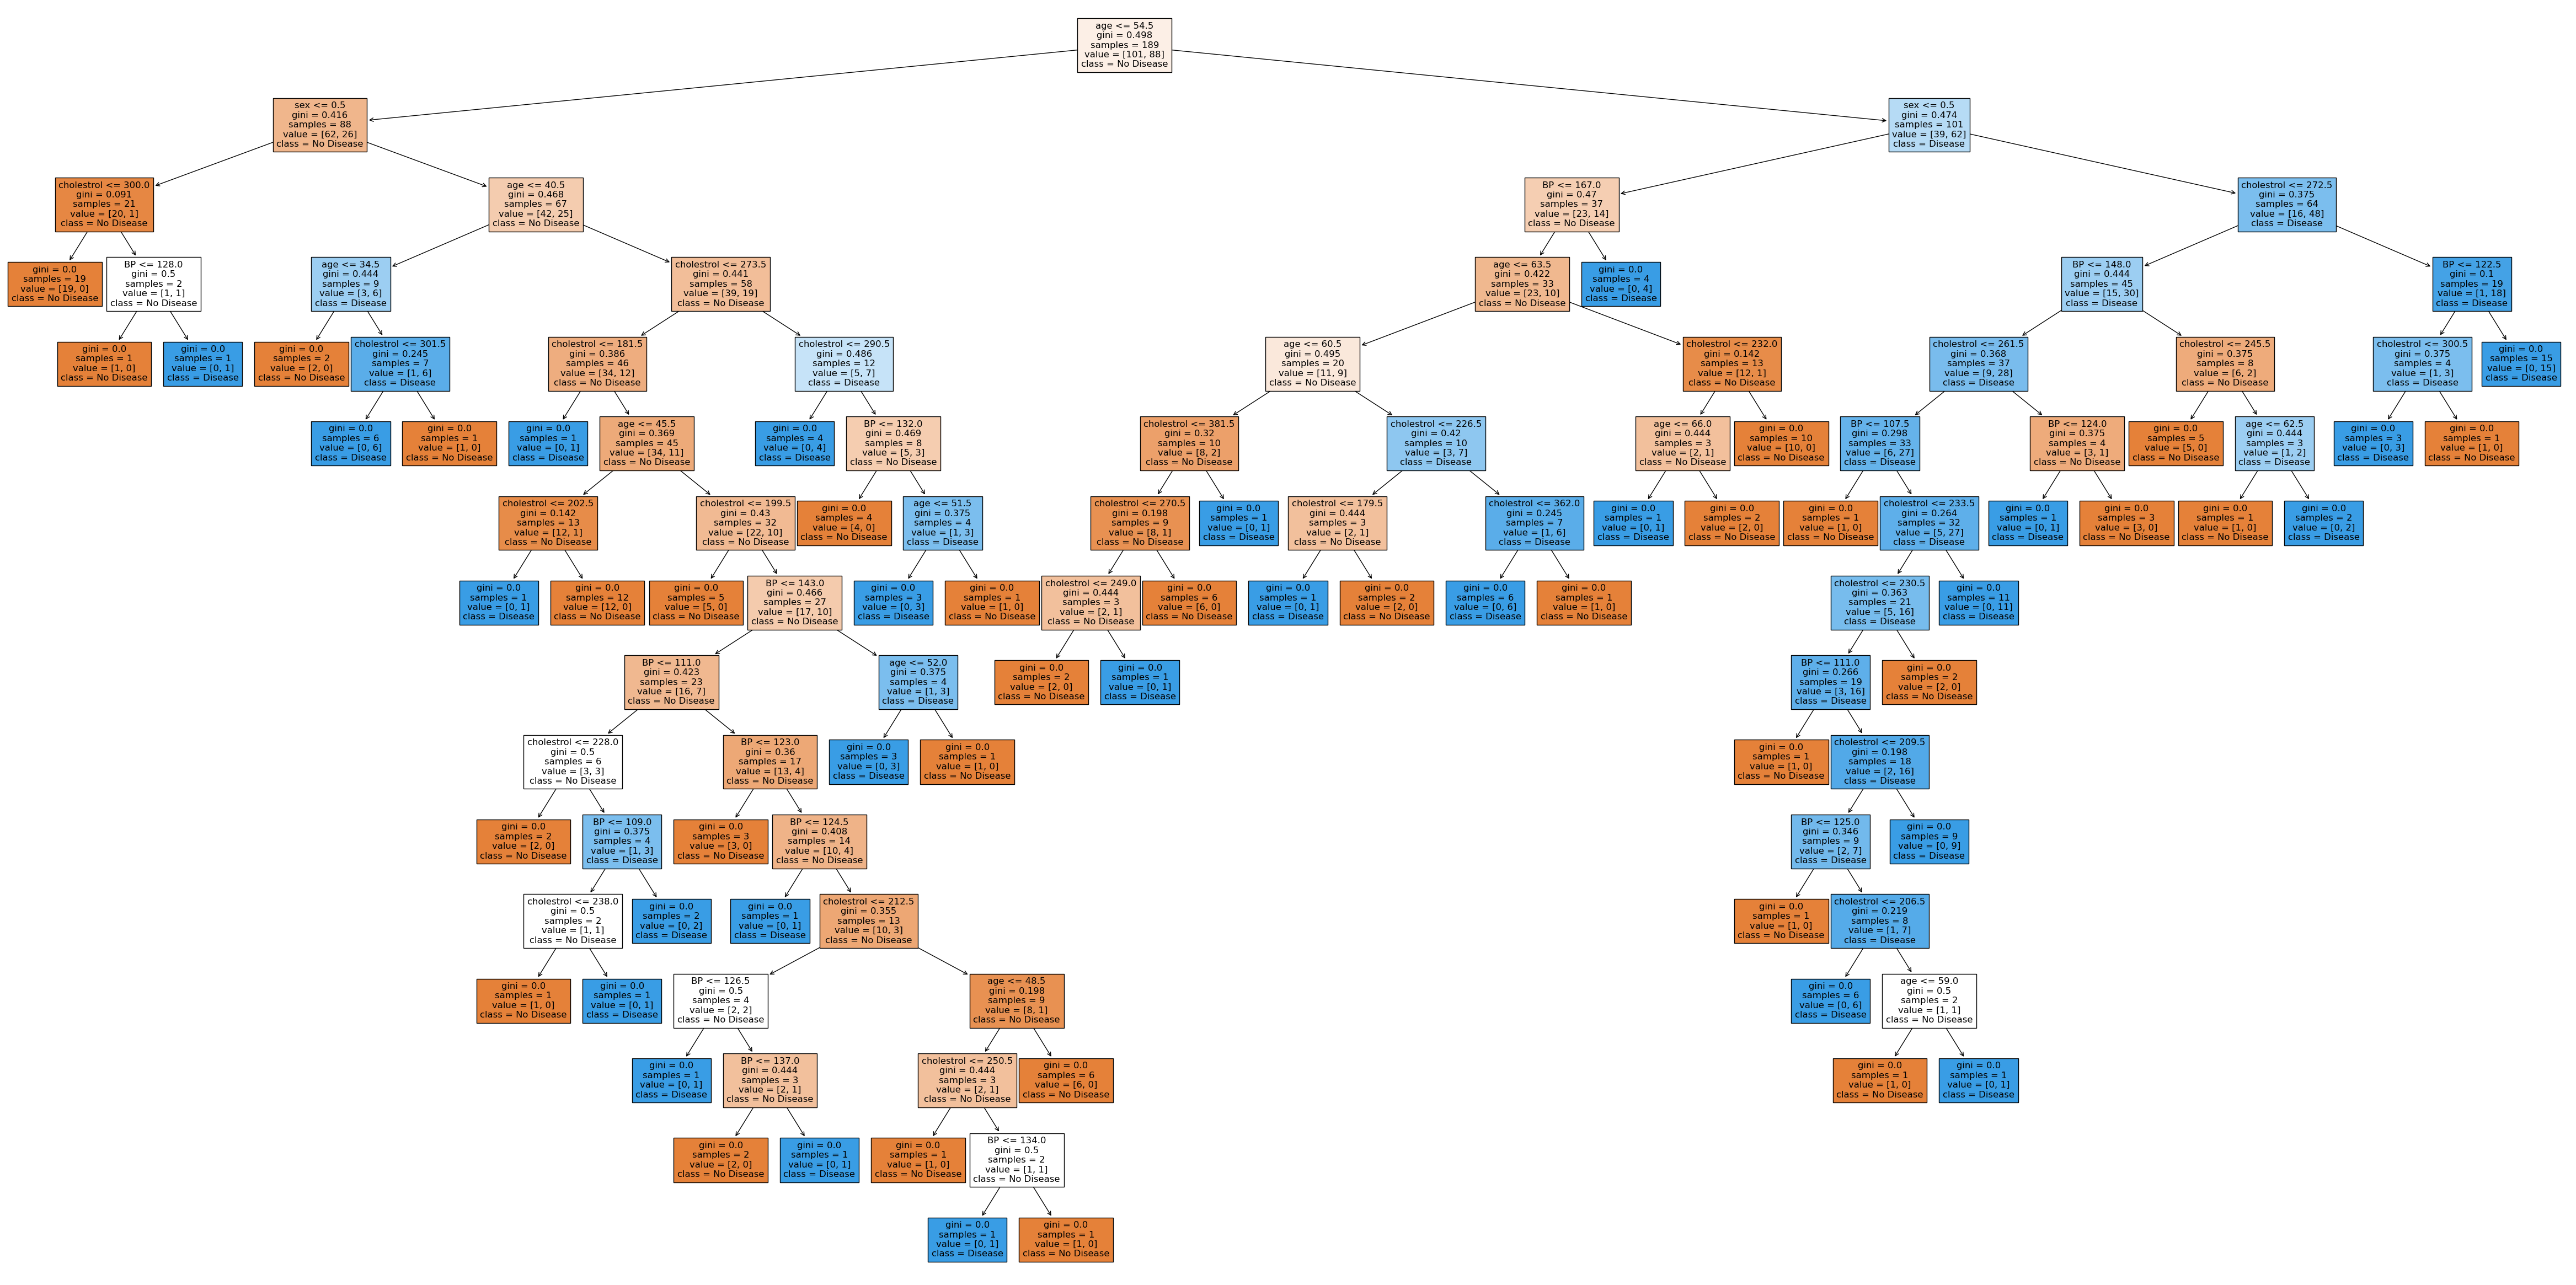

In [24]:
get_dt_graph(dt_default)

In [25]:
evaluate_model(dt_default)

Train set performance : 
1.0
[[101   0]
 [  0  88]]
--------------------------------------------------
Test set performance : 
0.6296296296296297
[[31 18]
 [12 20]]


Thats why we say that Decision Tree is a very high variance model,meaning it will severely overfits the data if we dont control it.

### Controlling the depth of the tree

In [26]:
dt_depth=DecisionTreeClassifier(max_depth=3,random_state=42)
dt_depth.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

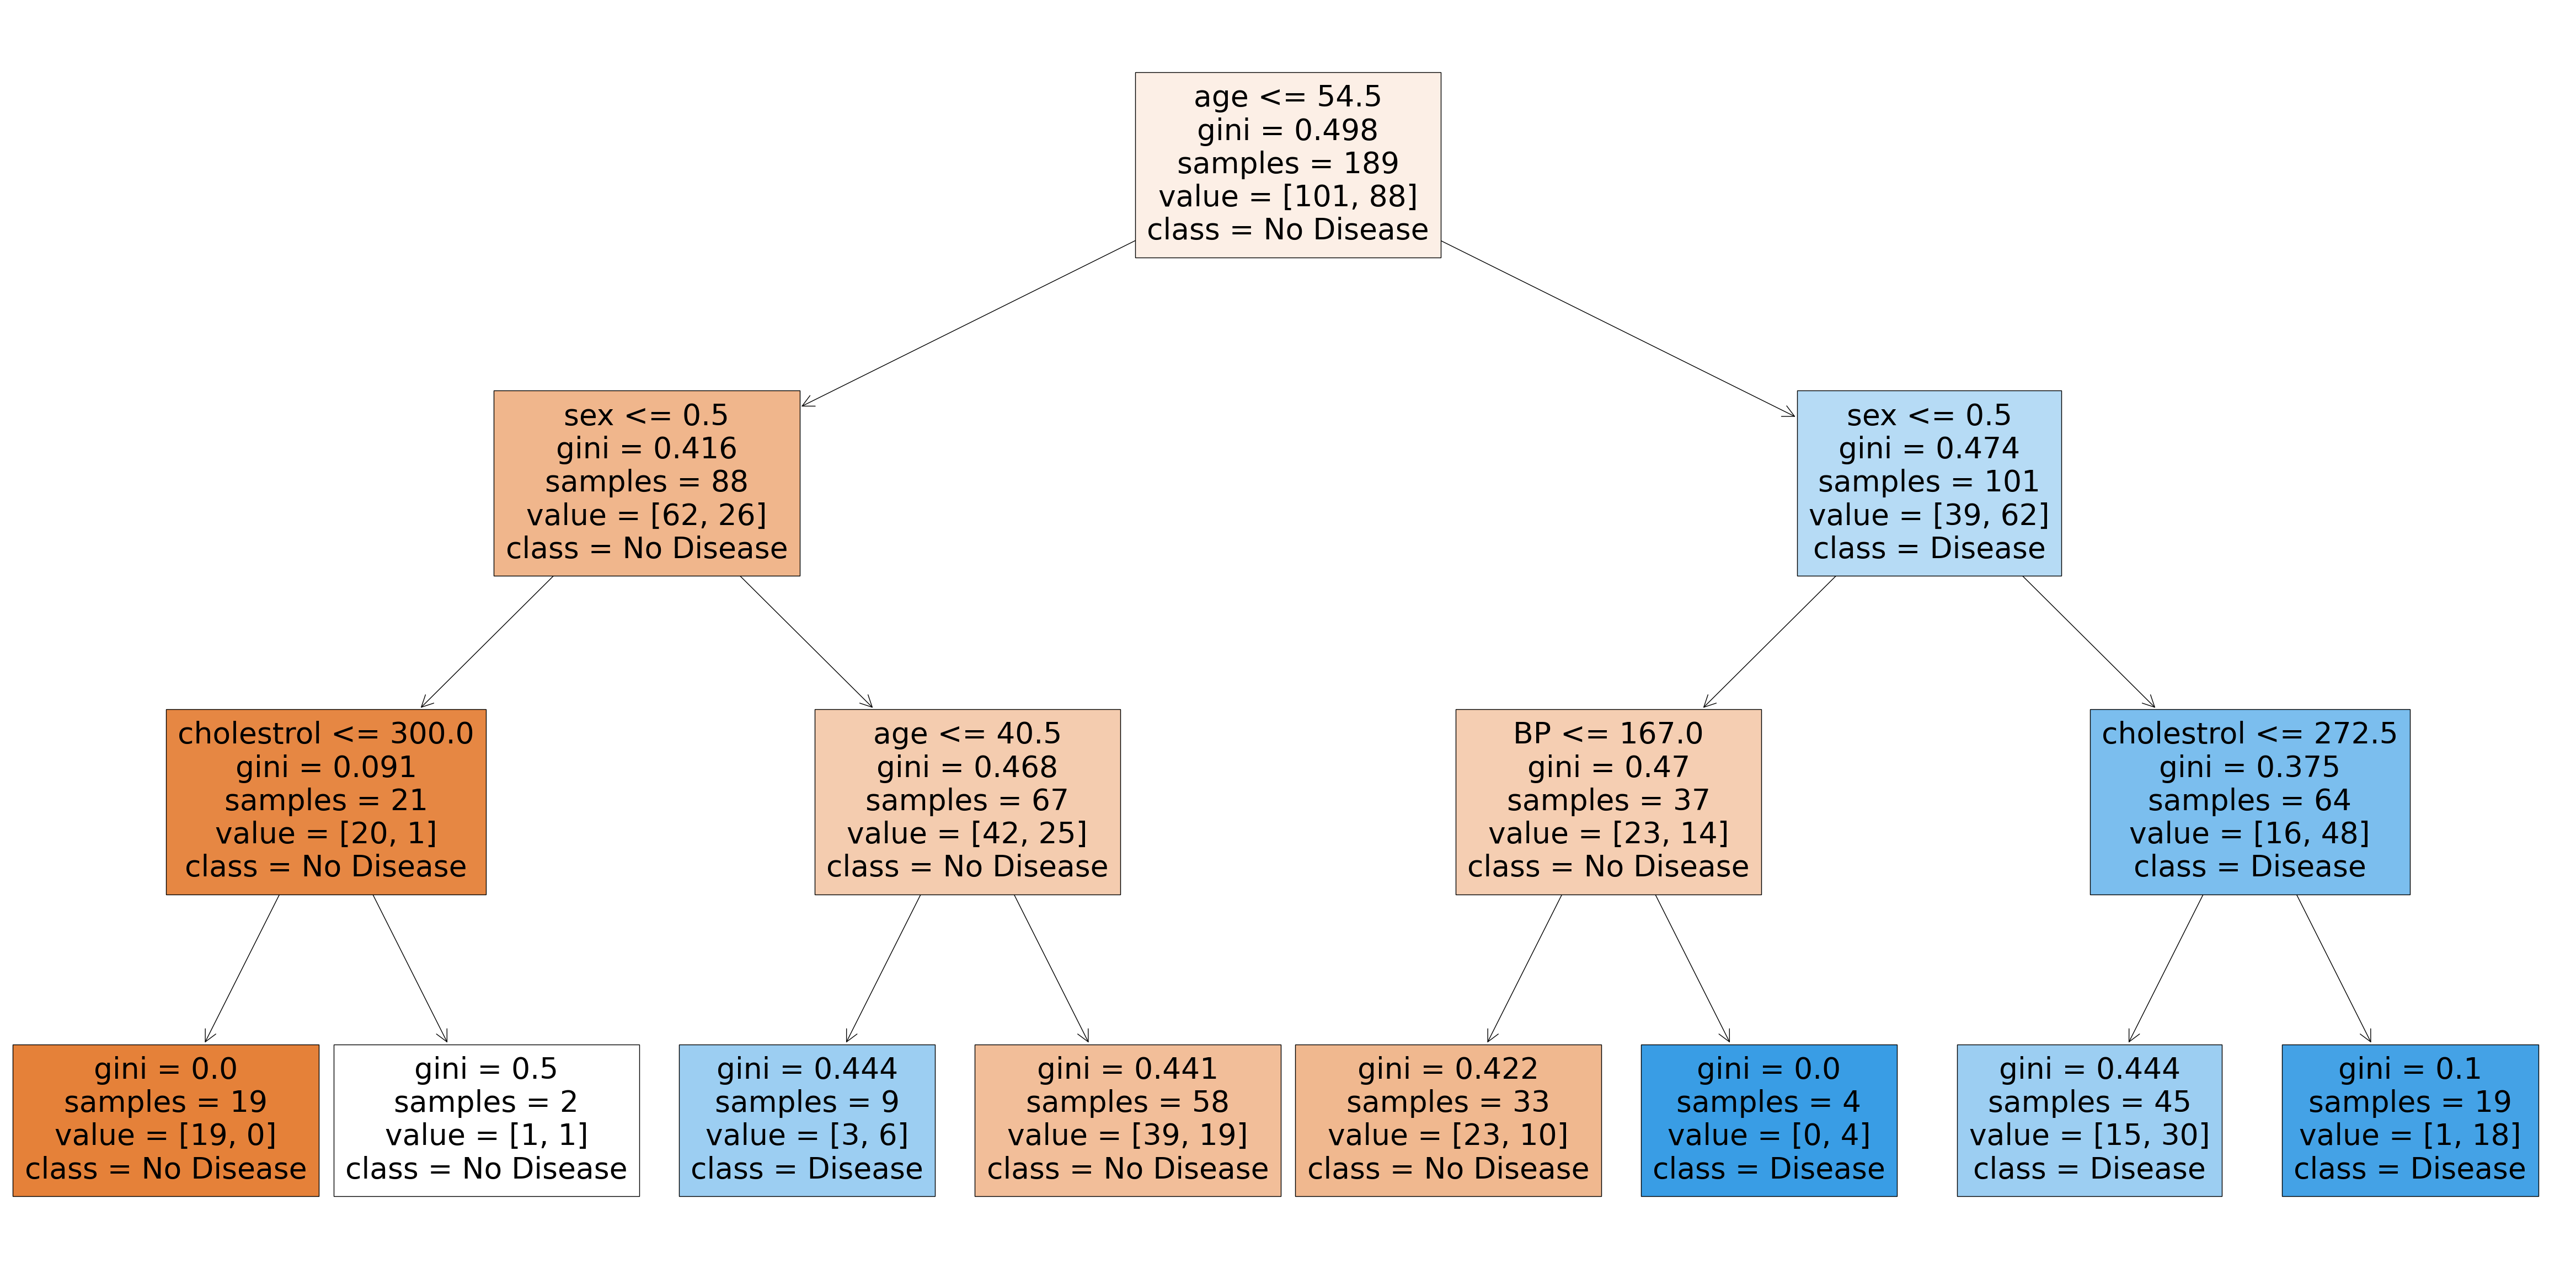

In [27]:
get_dt_graph(dt_depth)

In [28]:
evaluate_model(dt_depth)

Train set performance : 
0.7407407407407407
[[82 19]
 [30 58]]
--------------------------------------------------
Test set performance : 
0.6049382716049383
[[35 14]
 [18 14]]


### Specifying minimum samples before split

In [29]:
dt_min_split=DecisionTreeClassifier(min_samples_split=20,random_state=42)
dt_min_split.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_split=20, random_state=42)

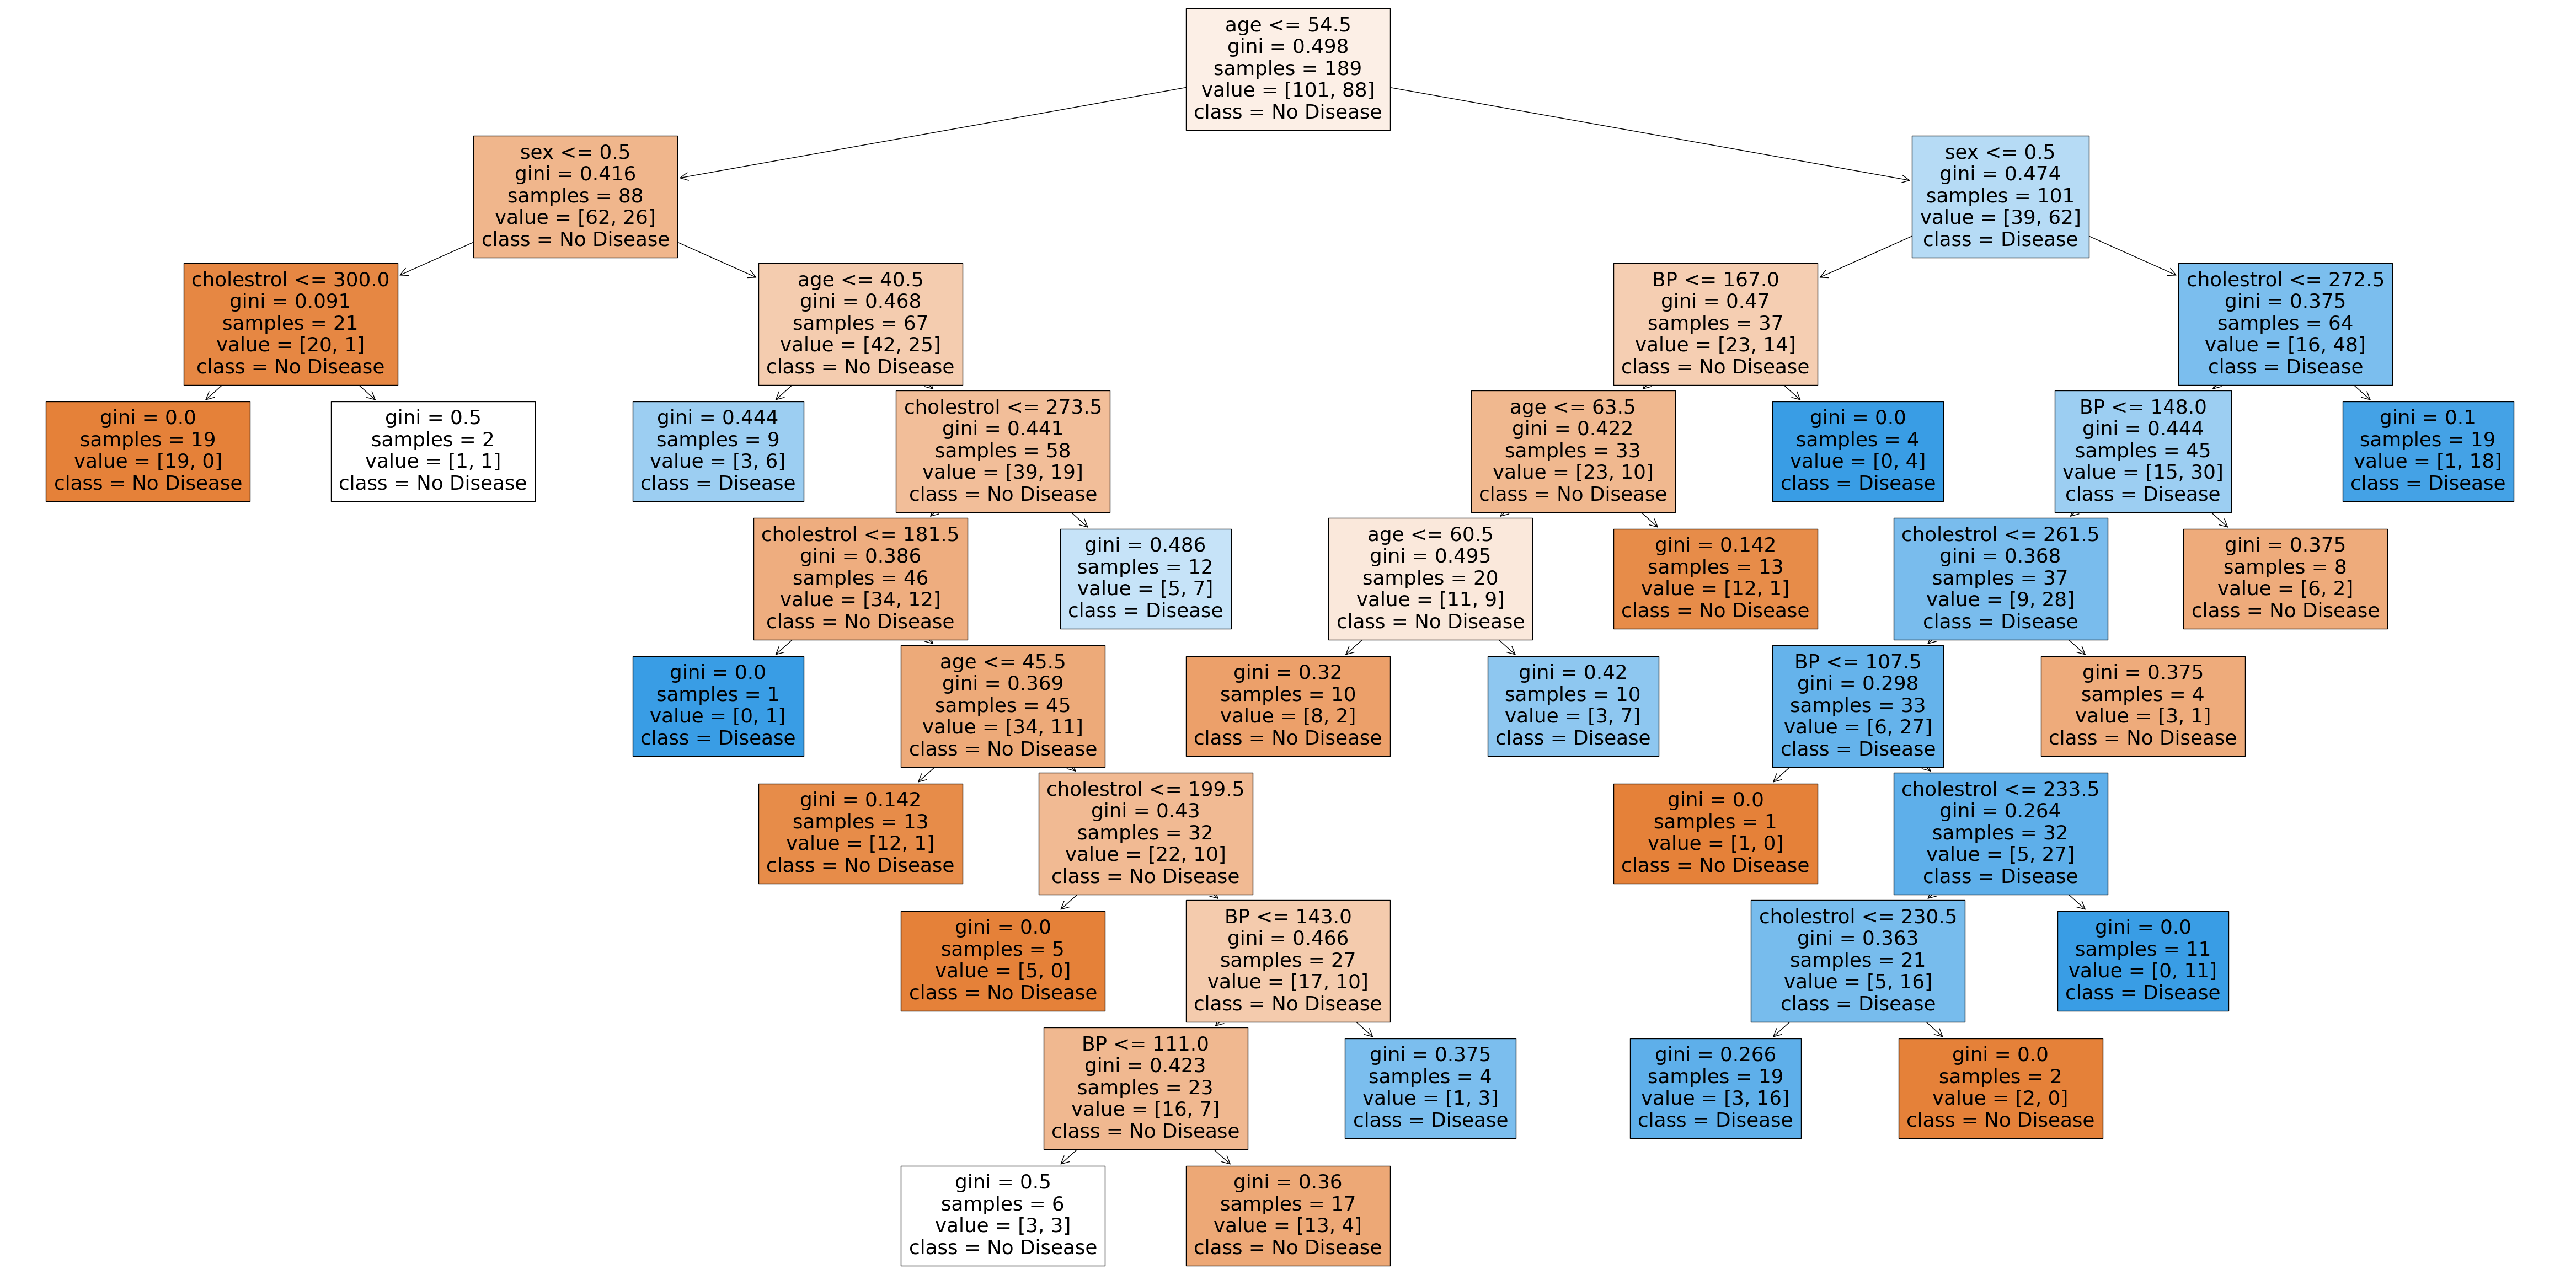

In [30]:
get_dt_graph(dt_min_split)

In [31]:
evaluate_model(dt_min_split)

Train set performance : 
0.8359788359788359
[[85 16]
 [15 73]]
--------------------------------------------------
Test set performance : 
0.6419753086419753
[[32 17]
 [12 20]]


### Specifying minimum samples in leaf node

In [32]:
dt_min_leaf=DecisionTreeClassifier(min_samples_leaf=20,random_state=42)
dt_min_leaf.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

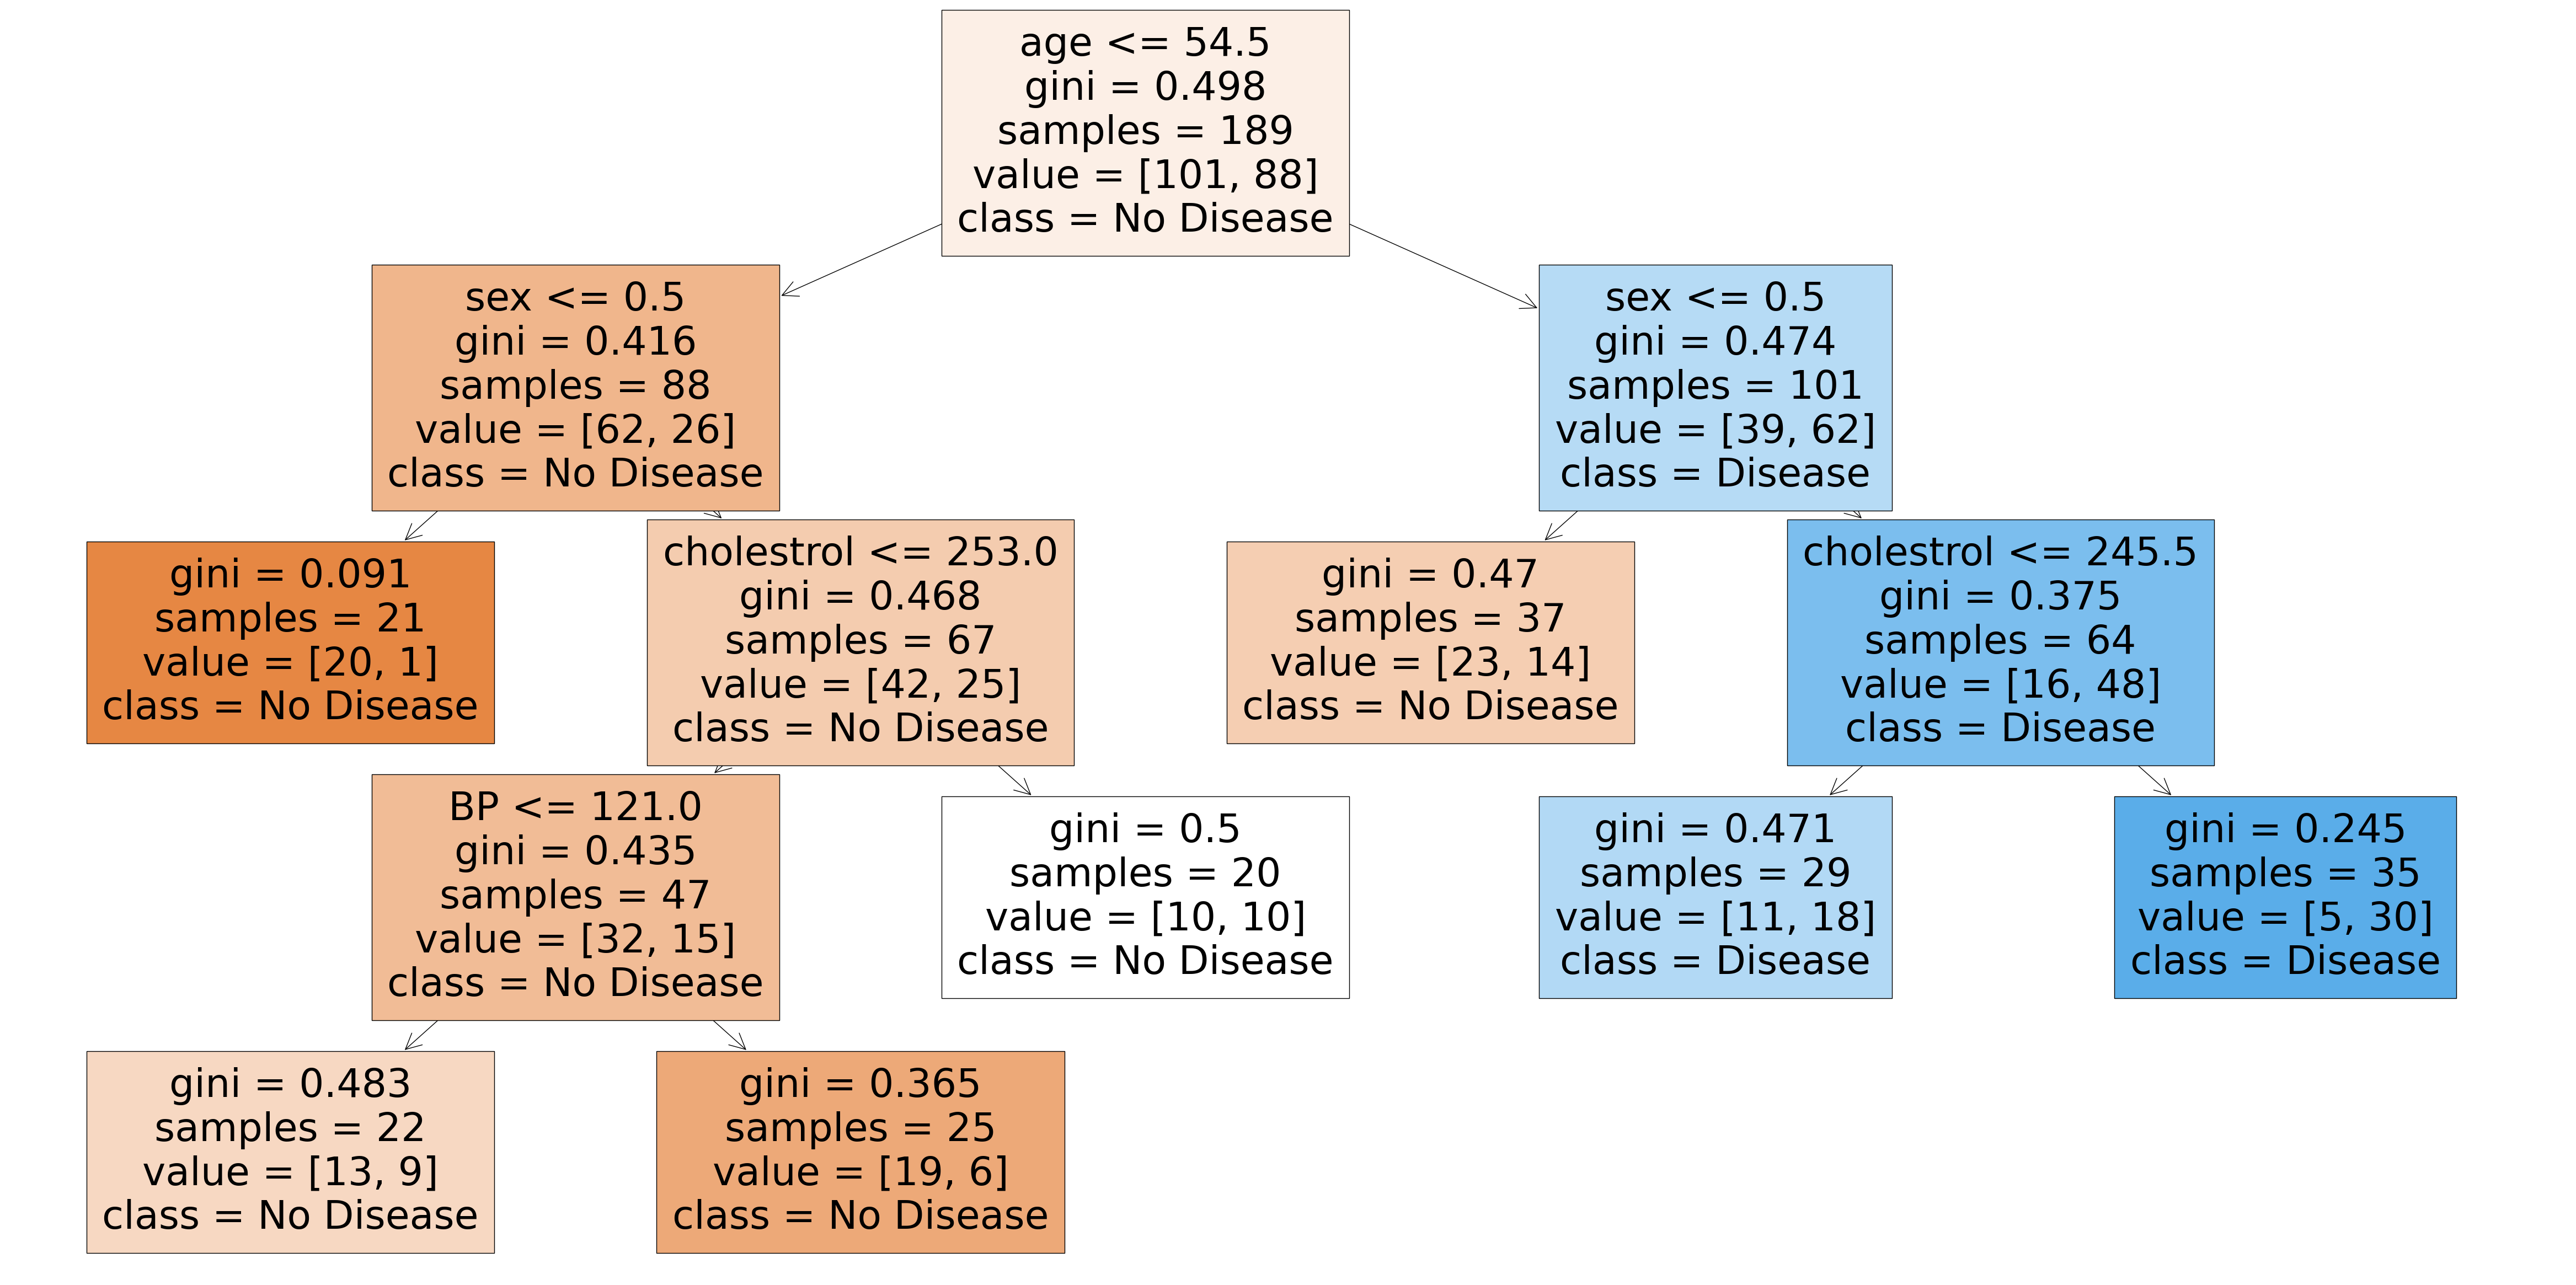

In [33]:
get_dt_graph(dt_min_leaf)

In [34]:
evaluate_model(dt_min_leaf)

Train set performance : 
0.7037037037037037
[[85 16]
 [40 48]]
--------------------------------------------------
Test set performance : 
0.6419753086419753
[[38 11]
 [18 14]]


As till now we get to know how changing the default hyperparameters improve the model performance. Let's look at how entropy can be used instead of Gini(which is a default parameter) to measure the quality of a split.

### Using Entropy instead of Gini

In [35]:
dt_min_leaf_entropy=DecisionTreeClassifier(min_samples_leaf=20,random_state=42,criterion='entropy')
dt_min_leaf_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20,
                       random_state=42)

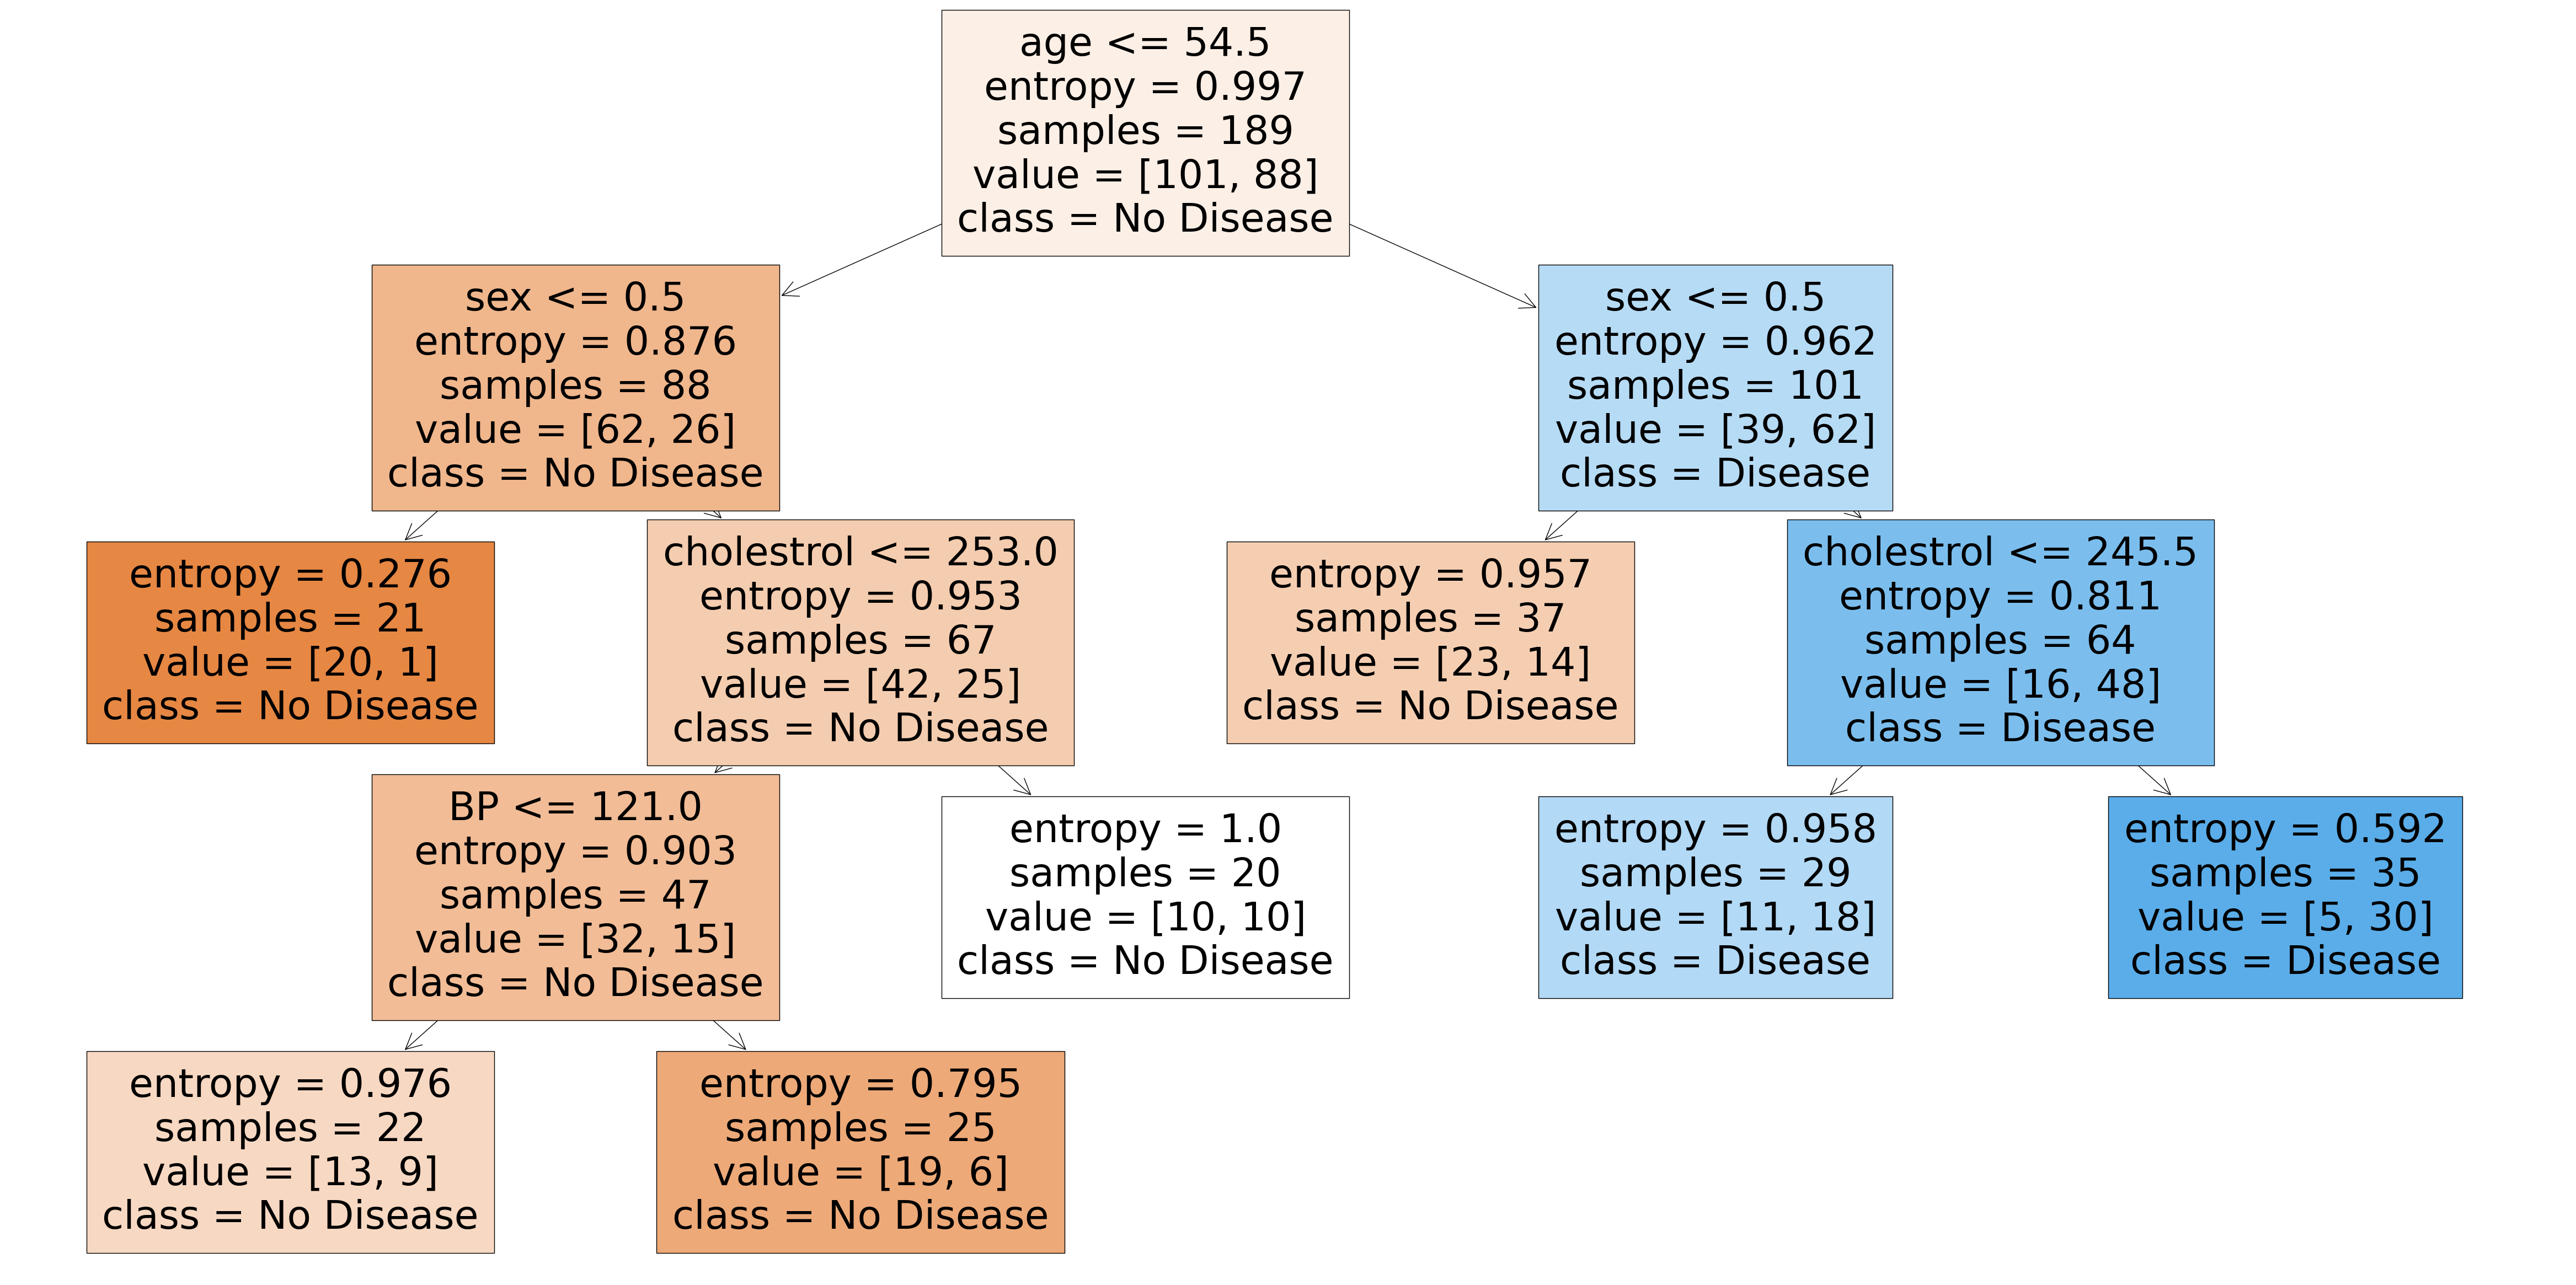

In [36]:
get_dt_graph(dt_min_leaf_entropy)

In [37]:
evaluate_model(dt_min_leaf_entropy)

Train set performance : 
0.7037037037037037
[[85 16]
 [40 48]]
--------------------------------------------------
Test set performance : 
0.6419753086419753
[[38 11]
 [18 14]]


This proves a point that entropy and ginni are numerically very very close and specially in smaller trees,
performance wise they are very very similar.


As we are  exploring different hyperparameters and how they affect the model's performance. The values we chose for the hyperparameters were mostly random. However, there's a better way to choose the best values for these hyperparameters. Therefore,lets tune the hyperparameters to find their optimal values using k-fold cross-validation.

### Hypermeter Tuning using Grid Search CV

In [38]:
dt=DecisionTreeClassifier(random_state=42)

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
# Create the parameter grid based on the results of random search 

params= {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf":[5,10,20,30,50],
    "criterion":["gini","entropy"]
    }

In [41]:
# Instantiate the grid search model

grid_search=GridSearchCV(
                         estimator=dt,
                         param_grid=params,
                         scoring="accuracy",
                         n_jobs=-1,
                         cv=4,
                         verbose=1 )

In [42]:
%%time
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
CPU times: total: 453 ms
Wall time: 7.51 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 30, 50]},
             scoring='accuracy', verbose=1)

In [43]:
cv_df=pd.DataFrame(grid_search.cv_results_)
cv_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.007822      0.001300         0.011906        0.012010   
1       0.004122      0.001583         0.004616        0.002905   
2       0.005635      0.001603         0.005623        0.005363   
3       0.003383      0.000823         0.005533        0.003031   
4       0.005543      0.000917         0.005850        0.003350   

  param_criterion param_max_depth param_min_samples_leaf  \
0            gini               2                      5   
1            gini               2                     10   
2            gini               2                     20   
3            gini               2                     30   
4            gini               2                     50   

                                              params  split0_test_score  \
0  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.708333   
1  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.708333   
2  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.687500   
3  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.687500   
4  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.666667   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0           0.744681           0.617021           0.531915         0.650488   
1           0.744681           0.617021           0.531915         0.650488   
2           0.744681           0.617021           0.531915         0.645279   
3           0.574468           0.574468           0.510638         0.586769   
4           0.680851           0.574468           0.702128         0.656028   

   std_test_score  rank_test_score  
0        0.082762               17  
1        0.082762               17  
2        0.079551               20  
3        0.063728               41  
4        0.048751                3

In [44]:
cv_df.shape

(50, 15)

In [45]:
#cv_df.sort_values(by="mean_test_score",ascending=False).head(5)

# or 

cv_df.nlargest(5,"mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
30       0.009418      0.001865         0.010914        0.011479   
5        0.006470      0.002364         0.006373        0.004978   
4        0.005543      0.000917         0.005850        0.003350   
9        0.005363      0.001615         0.003363        0.001489   
14       0.002805      0.001232         0.005720        0.000852   

   param_criterion param_max_depth param_min_samples_leaf  \
30         entropy               3                      5   
5             gini               3                      5   
4             gini               2                     50   
9             gini               3                     50   
14            gini               5                     50   

                                               params  split0_test_score  \
30  {'criterion': 'entropy', 'max_depth': 3, 'min_...           0.604167   
5   {'criterion': 'gini', 'max_depth': 3, 'min_sam...           0.625000   
4   {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.666667   
9   {'criterion': 'gini', 'max_depth': 3, 'min_sam...           0.666667   
14  {'criterion': 'gini', 'max_depth': 5, 'min_sam...           0.666667   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
30           0.765957           0.617021           0.680851         0.666999   
5            0.744681           0.595745           0.659574         0.656250   
4            0.680851           0.574468           0.702128         0.656028   
9            0.680851           0.574468           0.702128         0.656028   
14           0.680851           0.574468           0.702128         0.656028   

    std_test_score  rank_test_score  
30        0.064090                1  
5         0.055831                2  
4         0.048751                3  
9         0.048751                3  
14        0.048751                3

In [46]:
grid_search.best_score_

0.6669991134751774

In [47]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=42)

In [48]:
dt_best=grid_search.best_estimator_

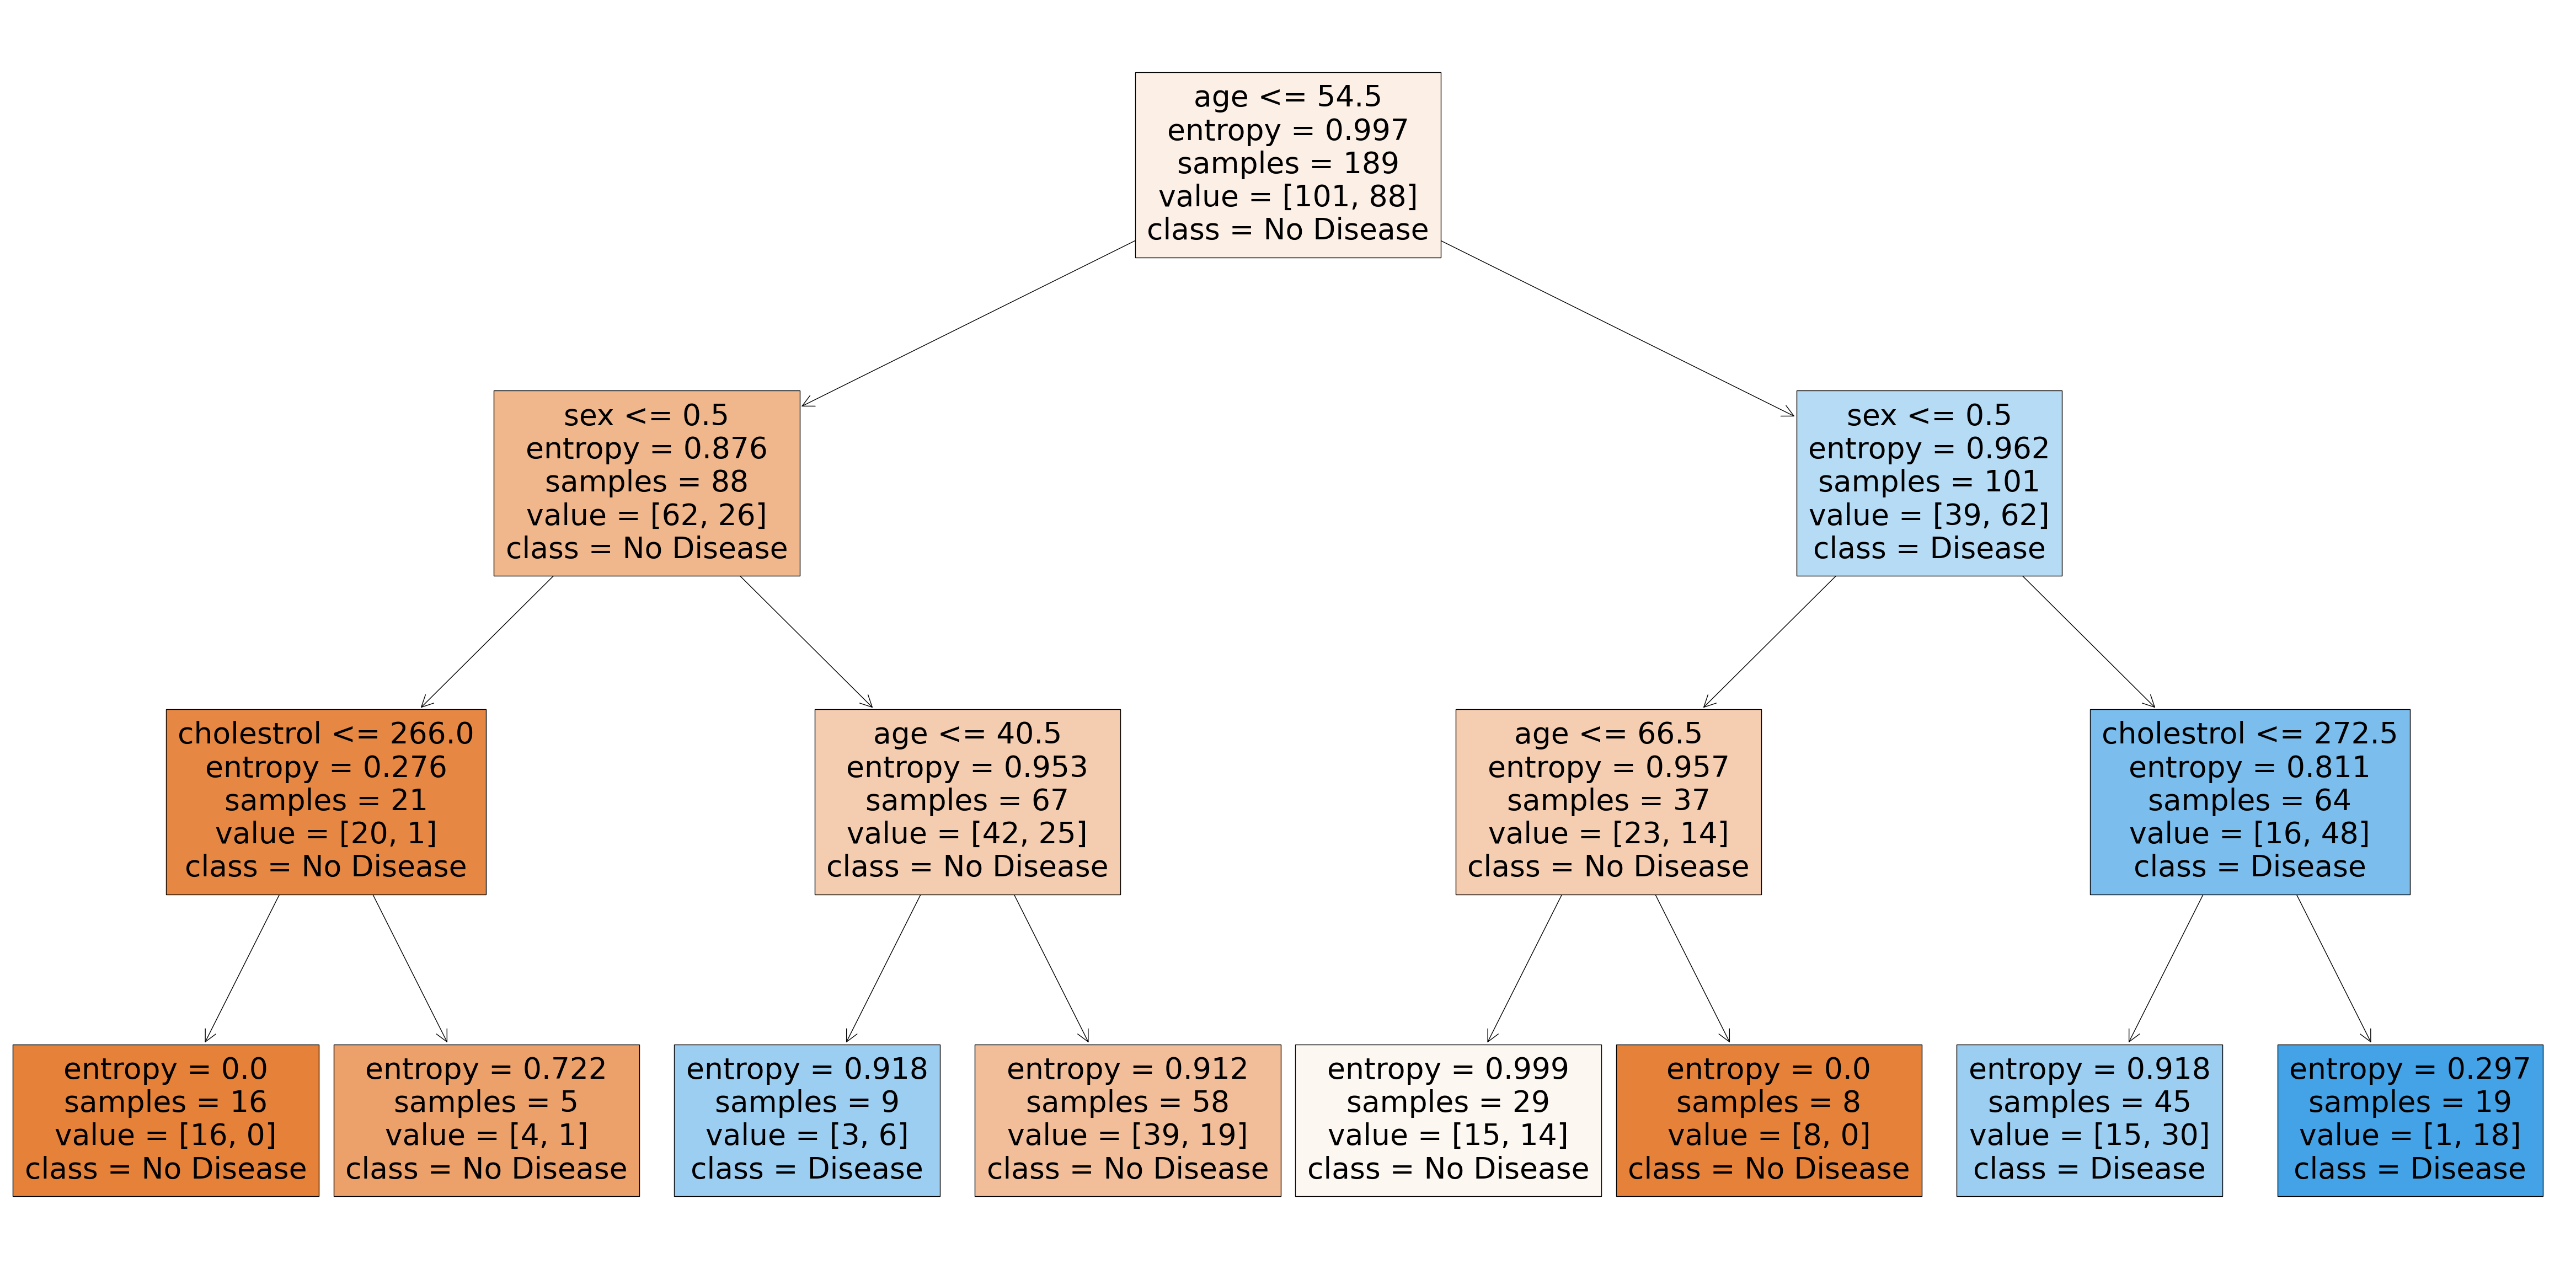

In [49]:
get_dt_graph(dt_best)

In [50]:
evaluate_model(dt_best)

Train set performance : 
0.7195767195767195
[[82 19]
 [34 54]]
--------------------------------------------------
Test set performance : 
0.6172839506172839
[[36 13]
 [18 14]]
